<a href="https://colab.research.google.com/github/DeryFerd/Machine-Learning-Project/blob/main/Codes/Logistic_Regression_HA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [2]:
df = pd.read_csv("https://bit.ly/3NjZ07u")
print('Total Row : ', len(df))
df.head()

Total Row :  303


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Business and Data Understanding

Dataset Explanation:

This dataset contains about patients conditions and habits in a health care. The goal for this dataset is to predict the chances of patients caught a heart attack or not.

Attribute Explanation:

1. age: The person’s age in years
2. sex: The person’s sex (1 = male, 0 = female)
3. cp: chest pain type
— Value 0: asymptomatic
— Value 1: atypical angina
— Value 2: non-anginal pain
— Value 3: typical angina
4. trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
5. chol: The person’s cholesterol measurement in mg/dl
6. fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: resting electrocardiographic results
— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
— Value 1: normal
— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
8. thalach: The person’s maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
11. slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
12. ca: The number of major vessels (0–3)
13. thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
14. target: Heart disease (1 = higher chance of heart attack, 0= higher chance of heart attack)

# Data Preprocessing

## Missing Values Handling

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in this dataset.

## Anomalies and Outliers Checking

In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

print("Total Row:", len(df))
print("Total Outliers in each Columns:")
print(outliers.sum())

Total Row: 303
Total Outliers in each Columns:
age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          25
thal         2
target       0
dtype: int64


Outliers detected in 7 columns but we can ignore it since it's encoded categorical data.

# Exploratory Data Analysis

## Variable Correlation to "target"

<Axes: >

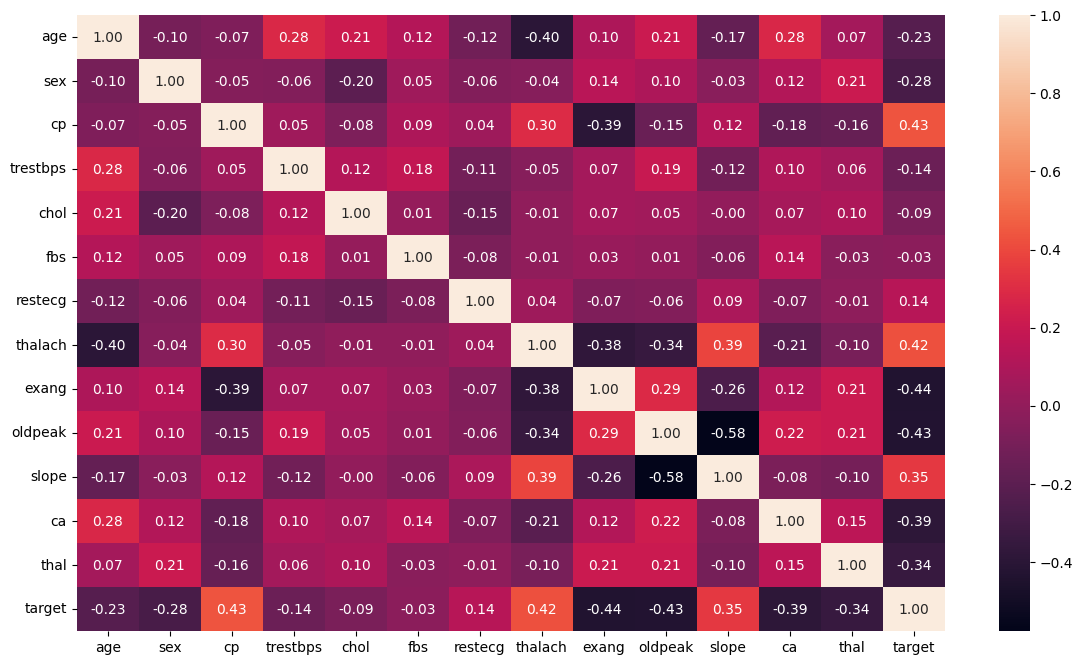

In [5]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [6]:
target_corr = df.corr()['target'].sort_values(ascending=False)

positive_corr = target_corr[target_corr > 0].sort_values(ascending=False)
negative_corr = target_corr[target_corr < 0].sort_values()

print("Most positive correlations:")
print(positive_corr)

print("\nMost negative correlations:")
print(negative_corr)

Most positive correlations:
target     1.000000
cp         0.433798
thalach    0.421741
slope      0.345877
restecg    0.137230
Name: target, dtype: float64

Most negative correlations:
exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
Name: target, dtype: float64


we can check the correlation between independent variables (x) and dependent variable (y). Our dependent variable in this dataset is "target" column. We can see that "cp" has the highest positive correlation with "target" and "exang" has the highest negative correlation with "target".

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

we can explore this "target" column to see how many patients had more chance of heart attack (vulnerable to heart attack). We have more patients who are vulnerable to heart attacks (1) with 165 people than patients who are not vulnerable to heart attack (0) with 138 people.


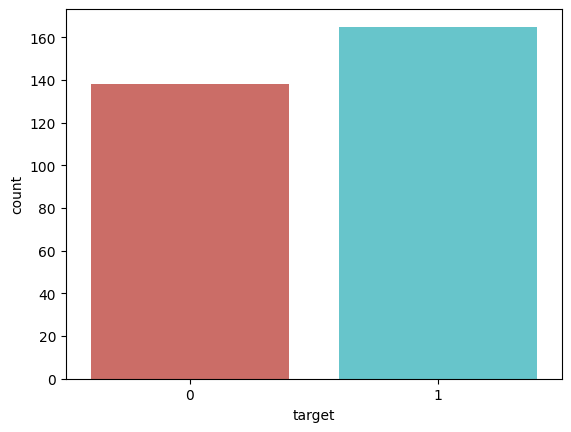

<Figure size 640x480 with 0 Axes>

In [8]:
sns.countplot(x = 'target', data=df, palette='hls')
plt.show()
plt.savefig('count plot')

In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


we can get some insights by averaging the independent variables and grouped it by target:
1. Those who are vulnerable to heart attacks (Target : 1) have lower average of age than those with lower chance of heart attack.
2. Those who are vulnerable to heart attacks have higher heart rate (thalach) than those with lower chance of heart attack. It does make sense since the symptom of heart disease is an increased heart rate.
3. Those who are vulnerable to heart attacks have lower blood pressure than those with lower chance of heart attack.
4. Those who are vulnerable to heart attacks have lower cholesterol measurement than those with lower chance of heart attack.


### Sex

In [10]:
# Create a table with only the "target" column.
table = pd.crosstab(index=df['sex'], columns=df['target'])

# Show the table
print(table)

target    0   1
sex            
0        24  72
1       114  93


Text(0, 0.5, 'Frequency of Target')

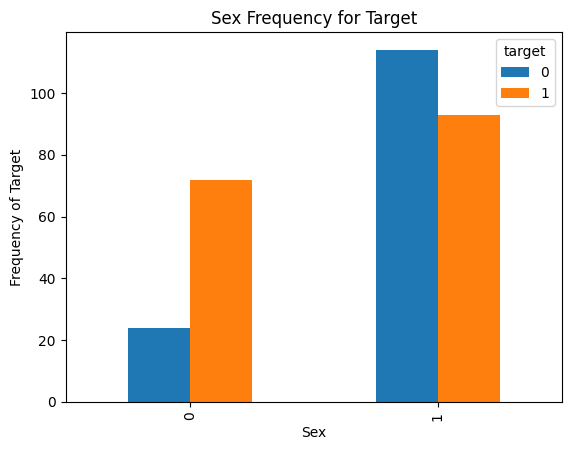

In [11]:
%matplotlib inline
pd.crosstab(df.sex,df.target).plot(kind='bar')
plt.title('Sex Frequency for Target')
plt.xlabel('Sex')
plt.ylabel('Frequency of Target')

From the correlation between sex and target, we can observe that both vulnerable and not vulnerable of male patients to caught heart attacks have a higher count compared to female patients.

### Age

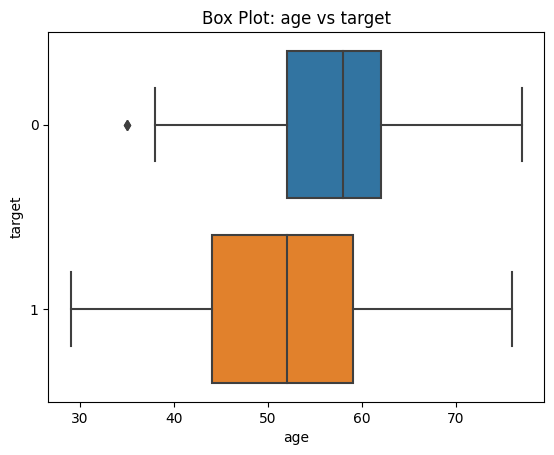

In [12]:
sns.boxplot(y=df['target'], x=df['age'], orient='h')
plt.xlabel('age')
plt.ylabel('target')
plt.title('Box Plot: age vs target')
plt.show()

Based on the above results, the average age range of individuals vulnerable to heart disease is younger compared to those who are not vulnerable to heart disease.

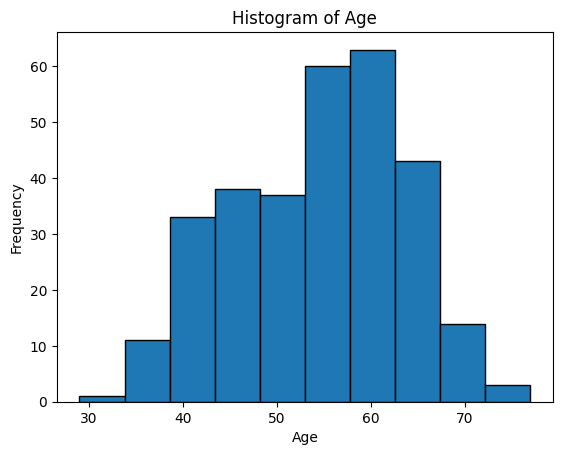

In [13]:
plt.hist(df['age'], bins=10, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

plt.show()

The highest frequency of these age patients is around 60 years old.

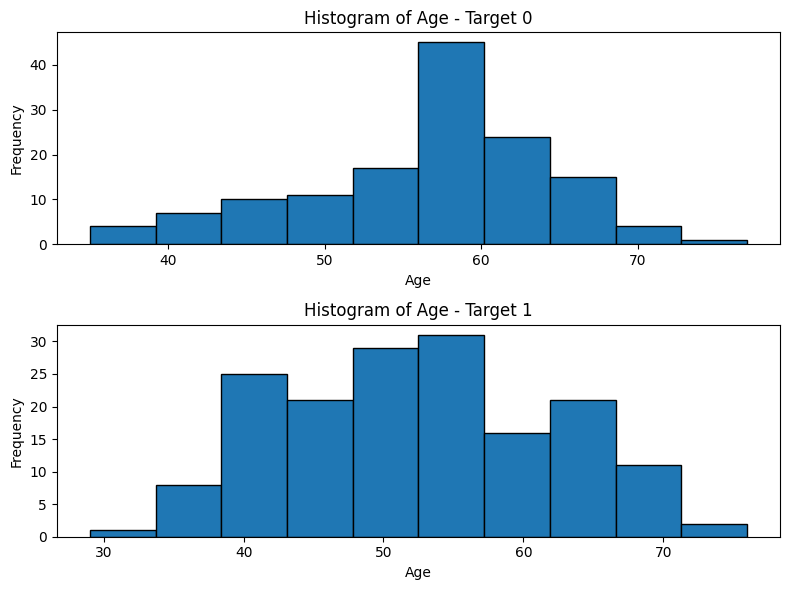

In [14]:
df_target_0 = df[df['target'] == 0]
df_target_1 = df[df['target'] == 1]

plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.hist(df_target_0['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age - Target 0')

plt.subplot(2, 1, 2)
plt.hist(df_target_1['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age - Target 1')

plt.tight_layout()

plt.show()

We can see that the age range of the highest number of patients who are not vulnerable to heart disease is between 56-60 years old, while for those who are vulnerable, it ranges between 50-55 years old

### Thal (Thalassemia)

Text(0, 0.5, 'Frequency of Target')

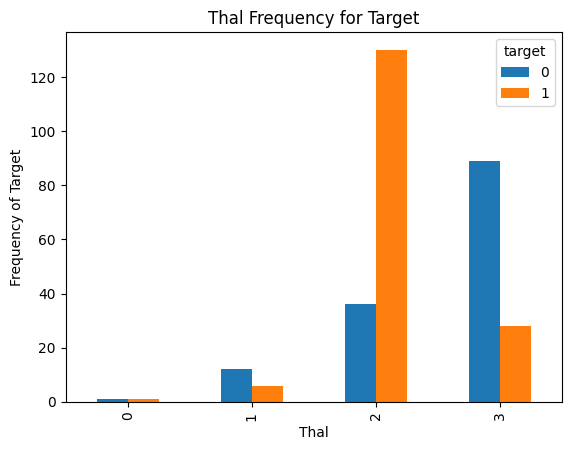

In [15]:
%matplotlib inline
pd.crosstab(df.thal,df.target).plot(kind='bar')
plt.title('Thal Frequency for Target')
plt.xlabel('Thal')
plt.ylabel('Frequency of Target')


The most common type of thalassemia among patients who are vulnerable to a heart attack is thalassemia type 2 (normal blood flow), while those who are not vulnerable typically have thalassemia type 3 (reversible defect (a blood flow is observed but it is not normal))

### Cp (Chest Pain)

Text(0, 0.5, 'Frequency of Target')

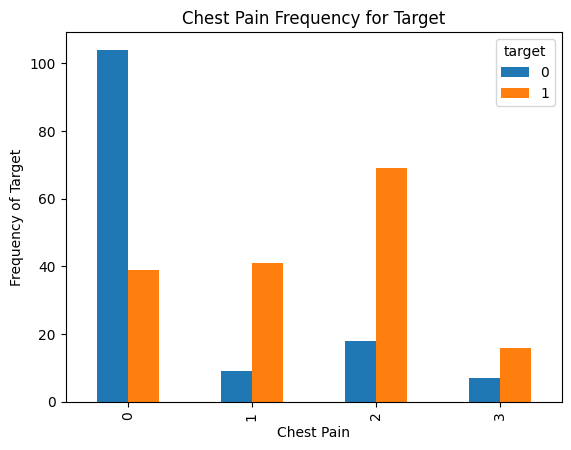

In [16]:
%matplotlib inline
pd.crosstab(df.cp,df.target).plot(kind='bar')
plt.title('Chest Pain Frequency for Target')
plt.xlabel('Chest Pain')
plt.ylabel('Frequency of Target')

The patients who are most vulnerable to a heart attack have the highest occurrence of type 2 chest pain (non-anginal pain)

### Thalach (max. Heart Rate)

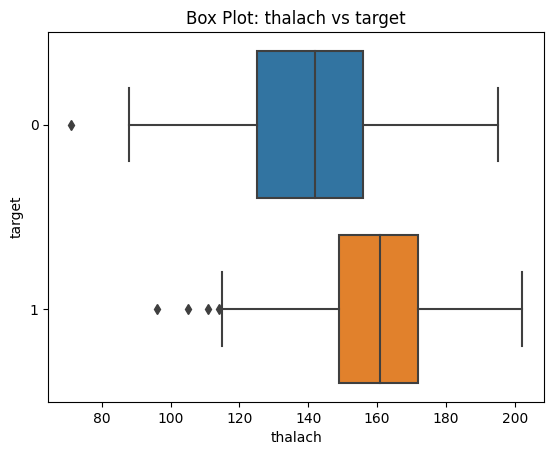

In [17]:
sns.boxplot(y=df['target'], x=df['thalach'], orient='h')
plt.xlabel('thalach')
plt.ylabel('target')
plt.title('Box Plot: thalach vs target')
plt.show()

Patients who are vulnerable to a heart attack have an average maximum heart rate ranging from 150-170, higher than those who are not vulnerable, which typically ranges from 120-160. This is quite logical since one of the symptoms of a heart attack is an increased heart rate per minute.

### Fbs (Fasting Blood Sugar)

In [18]:
table = pd.crosstab(index=df['fbs'], columns=df['target'])

print(table)

target    0    1
fbs             
0       116  142
1        22   23


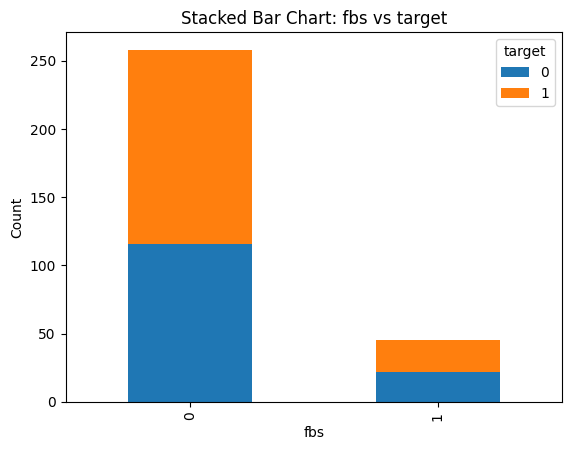

In [19]:
cross_tab = pd.crosstab(df['fbs'], df['target'])

cross_tab.plot(kind='bar', stacked=True)

plt.xlabel('fbs')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: fbs vs target')

plt.legend(title='target')

plt.show()


From that table and stacked bar chart, We found that 142 people who are vulnerable to a heart attack did not follow blood sugar fasting and only 23 people followed the blood sugar fasting, it means that FBS can help patients to reduce the chance to caught heart attack.

### Exang

Text(0, 0.5, 'Frequency of Target')

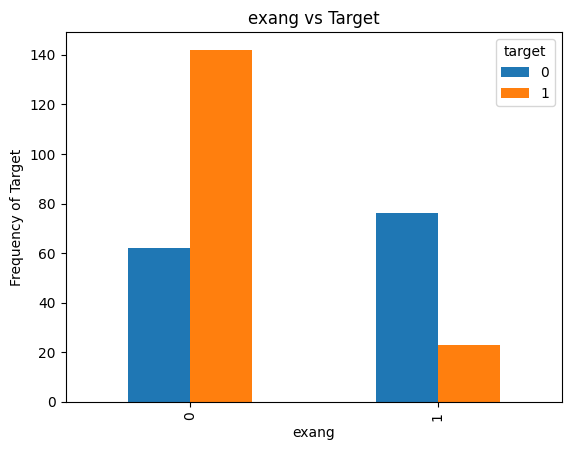

In [20]:
%matplotlib inline
pd.crosstab(df.exang,df.target).plot(kind='bar')
plt.title('exang vs Target')
plt.xlabel('exang')
plt.ylabel('Frequency of Target')

The patients who are vulnerable to a heart attack mostly didn't have exercise-induced angina.

### Slope

Text(0, 0.5, 'Frequency of Target')

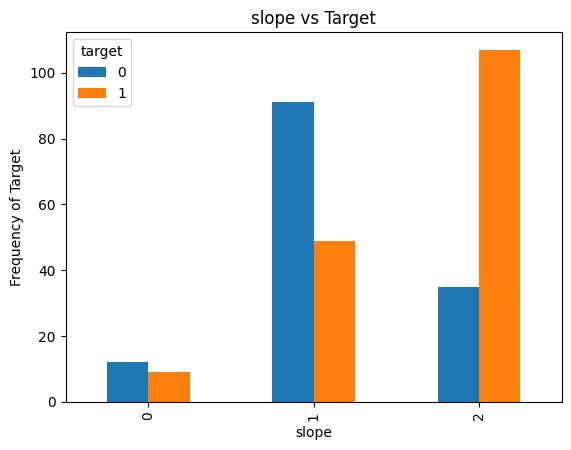

In [21]:
%matplotlib inline
pd.crosstab(df.slope,df.target).plot(kind='bar')
plt.title('slope vs Target')
plt.xlabel('slope')
plt.ylabel('Frequency of Target')

The patients who are most vulnerable to a heart attack have the highest occurrence of type 2 Slope (upsloping)

### Ca (num. Major Vessels)

Text(0, 0.5, 'Frequency of Target')

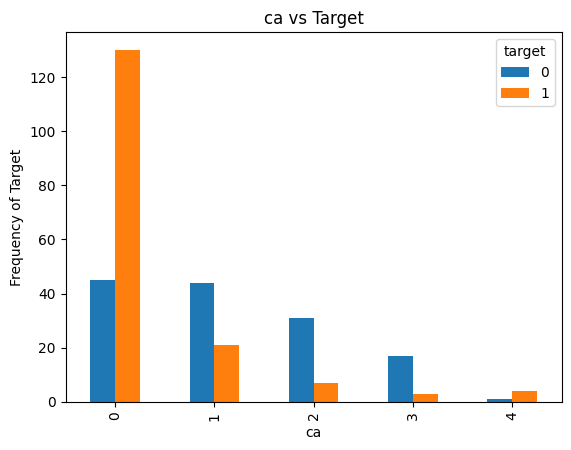

In [22]:
%matplotlib inline
pd.crosstab(df.ca,df.target).plot(kind='bar')
plt.title('ca vs Target')
plt.xlabel('ca')
plt.ylabel('Frequency of Target')

Most of the patients who are vulnerable to a heart attack didn't have any significant number of major vessels.

# Split Train-Test Dataset

In [23]:
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop(labels='target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

we split the dataset with 80% for train and 20% for test.

# Modelling

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
lr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_lr = lr.predict(X_test)
y_lr

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

we train the dataset with Logistic Regression model.

# Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

lr_accuracy = accuracy_score(y_test, y_lr)*100
lr_precision= precision_score(y_true=y_test, y_pred=y_lr, average='macro')*100
lr_recall= recall_score(y_true=y_test, y_pred=y_lr, average='macro')*100
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1)

In [27]:
df_score = pd.DataFrame({
    'Logistic Regression' :[lr_accuracy, lr_precision, lr_recall, auc(fpr, tpr)]
    },
    index=['Accuracy','Precision','Recall','AUC-ROC'])

df_score.T

,Accuracy,Precision,Recall,AUC-ROC
Logistic Regression,85.245902,85.164835,84.858388,0.848584


after we trained the dataset, we have to check our model's accuracy, precision, recall, and AUC-ROC. since we want to predict how many people who are vulnerable to heart attack, we use the accuracy metrics. We got that our accuracy model is 85.24%.

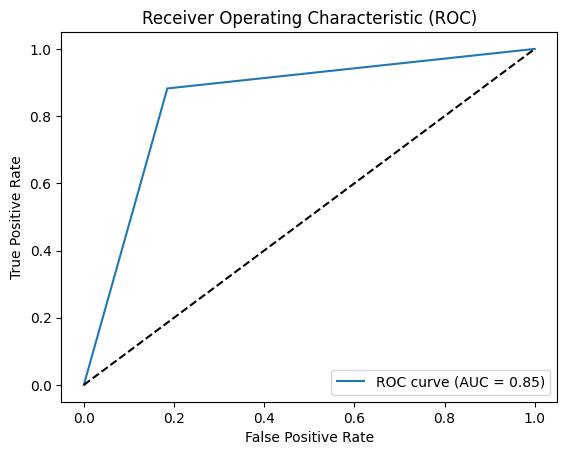

In [28]:
auc_roc = roc_auc_score(y_test, y_lr)

fpr, tpr, thresholds = roc_curve(y_test, y_lr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

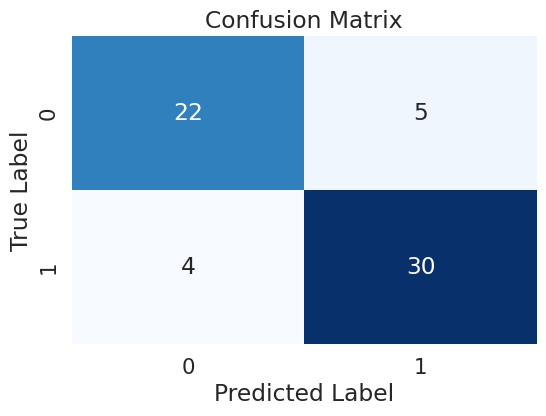

In [29]:
confusion_matrix=confusion_matrix(y_test, y_lr)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

We can also evaluate our model with Confusion Matrix. From those matrix we got that 22 samples from our model are true negative (not vulnerable to heart attack) and 30 samples are true negative (vulnerable to heart attack) while 4 samples are false negative and 5 samples are false positive. We can still improve our model with Hyperparameter tuning, over and undersampling, and so on.